In [9]:
import json
import os
import random
from PIL import Image
from IPython.display import display

# Print out some random thumbnails of the images of the dataset that match with duplicates.json

In [15]:
def display_thumbnails(image_folder, image_list, num_thumbnails):
    #get a random starting index
    start_index = random.randint(0, len(image_list) - num_thumbnails)
    for i in range(start_index, start_index + num_thumbnails):
        image_name = image_list[i]
        image_path = os.path.join(image_folder, f"{image_name}.jpg")
        img = Image.open(image_path)
        img.thumbnail((200, 200))
        display(img)
        print(image_name)

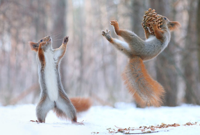

cvp1z46


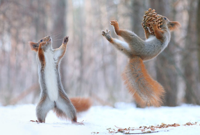

cvp4cnb


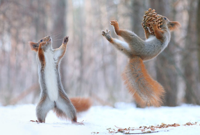

cvp5dh6


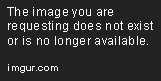

cvp71up


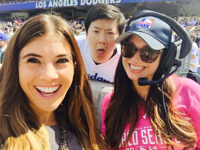

cvp73pk


In [17]:
image_folder = 'C:/Users/nello/Desktop/TESI_CODICE/dataset/public_image_set'
json_path = 'C:/Users/nello/Desktop/duplicates/TESI_CODICE/dataset/all_duplicates.json'

#read the list of duplicate image names from the JSON file
with open(json_path, 'r') as file:
    all_duplicates = json.load(file)

all_duplicates.sort()

#show thumbnails of the first X images
display_thumbnails(image_folder, all_duplicates, num_thumbnails=5)

# Print out some of the images in dataset that match the hash function for duplicate detection

In [5]:
import matplotlib.pyplot as plt
import cv2
import os
import hashlib

In [6]:
def file_hash(filepath):
    block_size = 65536
    file_hash = hashlib.sha256()
    with open(filepath, 'rb') as f:
        for block in iter(lambda: f.read(block_size), b''):
            file_hash.update(block)
    return file_hash.hexdigest()

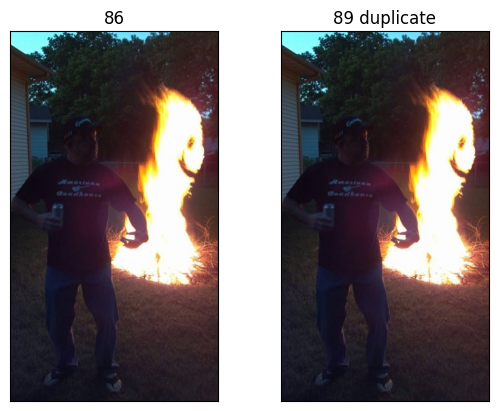

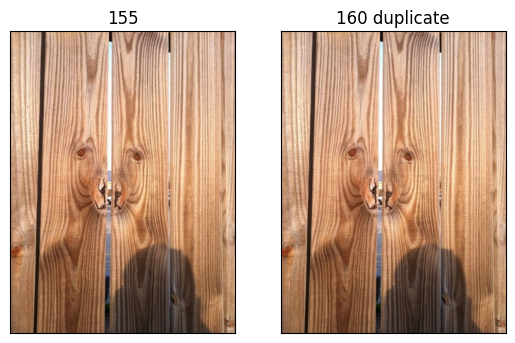

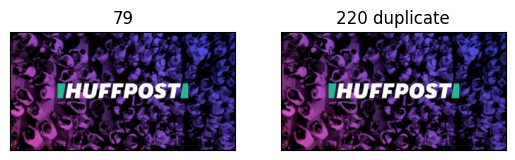

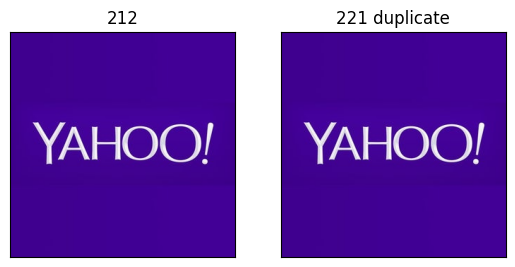

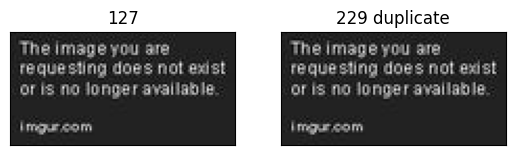

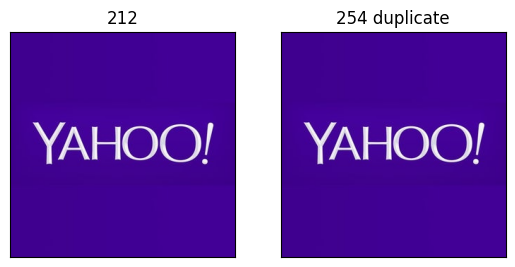

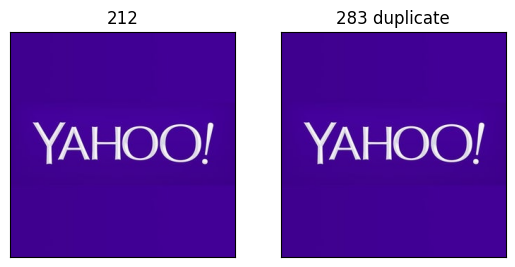

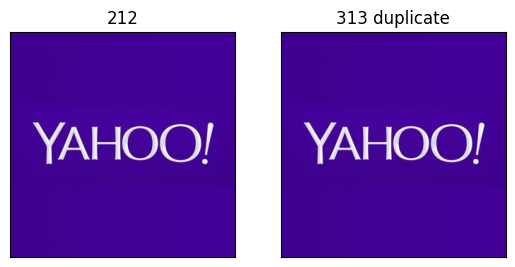

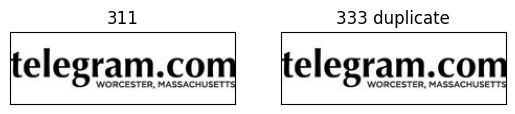

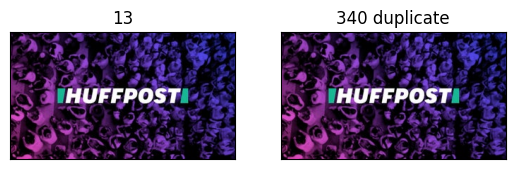

In [18]:
os.chdir('C:/Users/nello/Desktop/TESI_CODICE/dataset/public_image_set')
files_list = os.listdir()

#dictionary to store file hashes and their indexes
hash_keys = {}
duplicates = []

for index, filename in enumerate(files_list):
    if os.path.isfile(filename):
        filehash = file_hash(filename)
        if filehash not in hash_keys:
            hash_keys[filehash] = index
        else:
            duplicates.append((index, hash_keys[filehash]))

    if len(duplicates) >= 10:
        break

for file_indexes in duplicates:
    try:
        plt.subplot(121)
        img1 = cv2.imread(files_list[file_indexes[1]])
        plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
        plt.title(file_indexes[1])
        plt.xticks([]), plt.yticks([])

        plt.subplot(122)
        img2 = cv2.imread(files_list[file_indexes[0]])
        plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
        plt.title(str(file_indexes[0]) + ' duplicate')
        plt.xticks([]), plt.yticks([])

        plt.show()

    except OSError as e:
        continue